In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

### Parameters

In [6]:
dos_base = 1
kon_base = 0.1
koff_base = 0.01
psi_base = 0.1
frac = 0.5

def calc_k_e(dos_base, kon_base, koff_base, psi_base, frac):
    m_base = (kon_base * dos_base) / (koff_base + kon_base * psi_base)
    e_wd = frac / (m_base * (frac - 1) ** 2)
    k = koff_base * np.sqrt(2 * e_wd * m_base + np.sqrt(4 * e_wd * m_base + 1) + 1)
    return k, e_wd

k, e_wd = calc_k_e(dos_base, kon_base, koff_base, psi_base, frac)
print(k, e_wd)

0.028284271247461905 0.4000000000000001


### Model

In [7]:
def calc_koff(m, k, e_wd):
    return k / np.sqrt(2 * e_wd * m + np.sqrt(4 * e_wd * m + 1) + 1)

def mon(t, e_wd):
    return (-1 + np.sqrt((1 + 4*t*e_wd)))*(1 / e_wd)/2

def dim(t, e_wd):
    return t - (-1 + np.sqrt((1 + 4*t*e_wd)))*(1 / e_wd)/2

def dxdt(X, kant=0, kon=kon_base, k=k, e_wd=e_wd, psi=psi_base, beta=0):
    Pm = X[0] 
    Pc = X[1]
    
    r = np.zeros(6)
    r[0] = kon * Pc  
    r[1] = calc_koff(Pm, k, e_wd) * Pm
    r[2] = kant * (mon(Pm, e_wd) + (1 - beta) * dim(Pm, e_wd))
    
    dPm = r[0] - r[1] - r[2]
    dPc = - psi * (r[0] - r[1] - r[2])
    
    return dPm, dPc

### Toggle frac

<IPython.core.display.Javascript object>


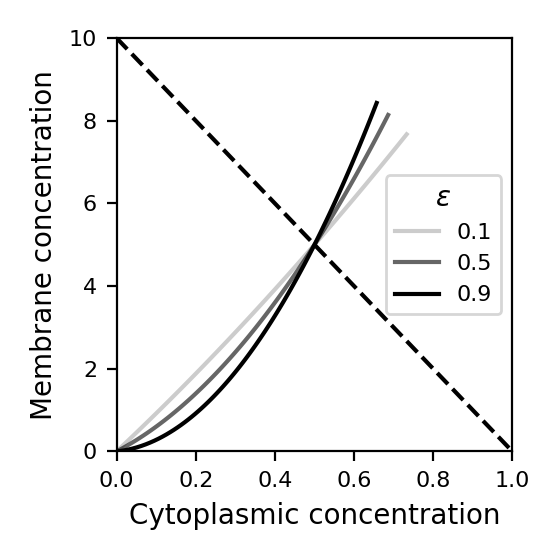

In [8]:
fig, ax = plt.subplots()
fracs = [0.1, 0.5, 0.9]
alphas = [0.2, 0.6, 1]
for f, alpha in zip(fracs, alphas):
    _k, _e_wd = calc_k_e(dos_base, kon_base, koff_base, psi_base, f)

    dos = np.linspace(0, 1.5, 100)
    res = np.zeros([2, 100])
    for i, d in enumerate(dos):
        def func(X, t):
            return dxdt(X, kant=0, kon=kon_base, k=_k, e_wd=_e_wd, psi=psi_base)
        sol = odeint(func, (0, d), t=np.linspace(0, 10000, 10000))[-1]
        res[:, i] = [sol[1], sol[0]]
    ax.plot(res[0], res[1], c='k', alpha=alpha, label=f)
    
ax.plot([0, 1], [10, 0], linestyle='--', c='k')
ax.legend(fontsize=8, title=r'$\epsilon$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel('Cytoplasmic concentration')
ax.set_ylabel('Membrane concentration')
ax.tick_params(axis='both', labelsize=8)

fig.set_size_inches(2.8, 2.8)
fig.tight_layout()
fig.savefig('Figs/epsilon.png', dpi=600, transparent=True)

### Toggle both

<IPython.core.display.Javascript object>


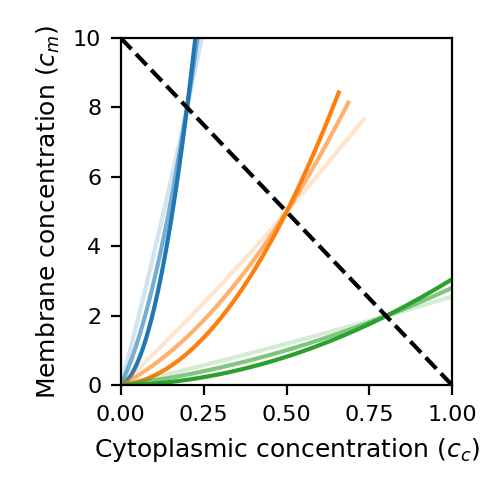

In [9]:
koffs = [0.0025, 0.01, 0.04]

fig, ax = plt.subplots()
for _koff, c in zip(koffs, ['tab:blue', 'tab:orange', 'tab:green']):
    for f, alpha in zip(fracs, alphas):
        _k, _e_wd = calc_k_e(dos_base, kon_base, _koff, psi_base, f)

        dos = np.linspace(0, 1.5, 100)
        res = np.zeros([2, 100])
        for i, d in enumerate(dos):
            def func(X, t):
                return dxdt(X, kant=0, kon=kon_base, k=_k, e_wd=_e_wd, psi=psi_base)
            sol = odeint(func, (0, d), t=np.linspace(0, 10000, 10000))[-1]
            res[:, i] = [sol[1], sol[0]]
        ax.plot(res[0], res[1], c=c, alpha=alpha)
    ax.plot([0], [0], c=c, label=_koff)
        
ax.plot([0, 1], [10, 0], linestyle='--', c='k')
# ax.legend(fontsize=8, title=r'$\alpha \; (s^{-1})$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel('Cytoplasmic concentration ' + r'$(c_c)$', fontsize=9)
ax.set_ylabel('Membrane concentration ' + r'$(c_m)$', fontsize=9)
ax.tick_params(axis='both', labelsize=8)

fig.set_size_inches(2.5,2.5)
fig.tight_layout()
fig.savefig('Figs/koff.png', dpi=600, transparent=True)

### Dimerisation

In [10]:
# fig, ax = plt.subplots()
# for f, alpha in zip(fracs, [1, 0.8, 0.6, 0.4]):
#     _k, _e_wd = calc_k_e(dos_base, kon_base, koff_base, psi_base, f)

#     dos = np.linspace(0, 1.5, 100)
#     res = np.zeros([2, 100])
#     for i, d in enumerate(dos):
#         def func(X, t):
#             return dxdt(X, kant=0, kon=kon_base, k=_k, e_wd=_e_wd, psi=psi_base)
#         sol = odeint(func, (0, d), t=np.linspace(0, 10000, 10000))[-1]
#         mem_mon = mon(sol[0], _e_wd)
#         res[:, i] = [d, mem_mon / sol[0]]
#     ax.plot(res[0], res[1], c='k', alpha=alpha, label=f)
    
# ax.legend(fontsize=8, title=r'$\epsilon$')
# # ax.set_xlim(0, 1)
# # ax.set_ylim(0, 10)
# ax.set_xlabel('Dosage')
# ax.set_ylabel('Membrane monomer fraction')
# ax.tick_params(axis='both', labelsize=8)

# fig.set_size_inches(3,3)
# fig.tight_layout()
# # fig.savefig('Figs/epsilon.png', dpi=600, transparent=True)

### Antagonism - scheme 1

Monomers and dimers treated equally

<IPython.core.display.Javascript object>


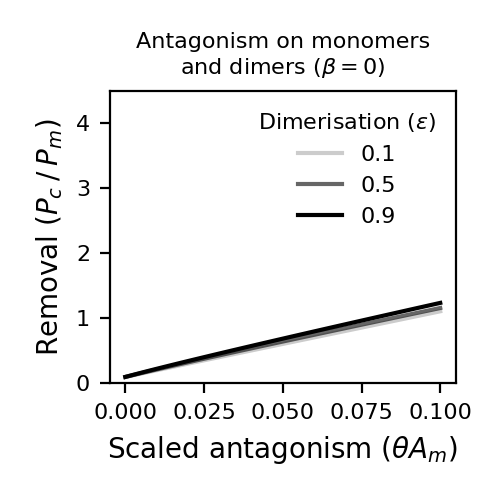

In [24]:
fig, ax = plt.subplots()
for f, alpha in zip(fracs, alphas):
    _k, _e_wd = calc_k_e(dos_base, kon_base, koff_base, psi_base, f)
    _m_base = (kon_base * dos_base) / (koff_base + kon_base * psi_base)

    kants = np.linspace(0, 0.1, 100)
    res = np.zeros([2, 100])
    for i, _kant in enumerate(kants):
        def func(X, t):
            return dxdt(X, kant=_kant, kon=kon_base, k=_k, e_wd=_e_wd, psi=psi_base, beta=0)
        sol = odeint(func, (0, 1), t=np.linspace(0, 10000, 10000))[-1]
        res[:, i] = [_kant, sol[1] / sol[0]]
    ax.plot(res[0], res[1], c='k', alpha=alpha, label=f)
    
legend = ax.legend(fontsize=8, title='Dimerisation ' + r'$(\epsilon)$', frameon=False)
legend.get_title().set_fontsize(8)
ax.set_xlabel('Scaled antagonism ' + r'$(\theta A_m)$')
ax.set_ylabel('Removal ' + r'$(P_{c} \: / \: P_{m})$')
ax.tick_params(axis='both', labelsize=8)
ax.set_ylim(0, 4.5)
ax.set_title('Antagonism on monomers\nand dimers 'r'$(\beta = 0)$', fontsize=8)

fig.set_size_inches(2.5,2.5)
fig.tight_layout()
fig.savefig('Figs/a_rundown_beta_0.png', dpi=600, transparent=True)

### Antagonism - scheme 2
Only monomers antagonised. Looks like this gives a little bit of nonlinearity. I've adjusted here and above so that kant represents antagonism at full dosage

<IPython.core.display.Javascript object>


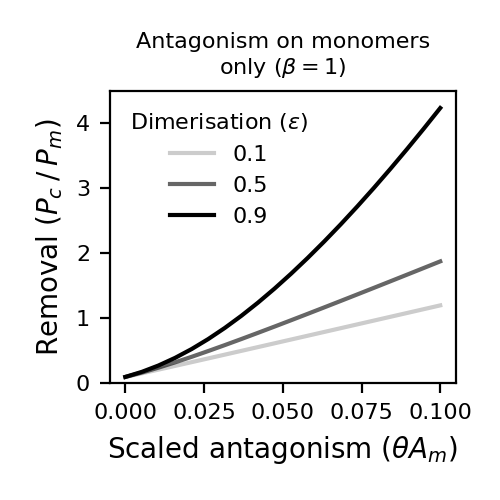

In [26]:
beta = 1

fig, ax = plt.subplots()
for f, alpha in zip(fracs, alphas):
    _k, _e_wd = calc_k_e(dos_base, kon_base, koff_base, psi_base, f)
    _m_base = (kon_base * dos_base) / (koff_base + kon_base * psi_base)
    g = mon(_m_base, _e_wd) + (1 - beta) * dim(_m_base, _e_wd)

    kants = np.linspace(0, 0.1, 20)
    res = np.zeros([2, 20])
    for i, _kant in enumerate(kants):
        def func(X, t):
            return dxdt(X, kant=_kant / (1 - beta * f), kon=kon_base, k=_k, e_wd=_e_wd, psi=psi_base, beta=beta)
        sol = odeint(func, (0, 1), t=np.linspace(0, 10000, 10000))[-1]
        res[:, i] = [_kant, sol[1] / sol[0]]
    ax.plot(res[0], res[1], c='k', alpha=alpha, label=f)
    
legend = ax.legend(fontsize=8, title='Dimerisation ' + r'$(\epsilon)$', frameon=False)
legend.get_title().set_fontsize(8)
ax.set_xlabel('Scaled antagonism ' + r'$(\theta A_m)$')
ax.set_ylabel('Removal ' + r'$(P_{c} \: / \: P_{m})$')
ax.tick_params(axis='both', labelsize=8)
ax.set_ylim(0, 4.5)
ax.set_title('Antagonism on monomers\nonly 'r'$(\beta = 1)$', fontsize=8)

fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/a_rundown_beta_1.png', dpi=600, transparent=True)

### Energies fig 1

1) Calculate frac as a function of e_wd and lambda e_-wm

2) Calculate koff as a function of e_wd and lambda e_-wm

Probably have to calculate membrane conc numerically

In [9]:
def calc_frac(t, k1, k2):
    return (2*k2*t - np.sqrt(4*k2*t + 1) + 1)/(2*k2*t)
    
def calc_koff(t, k1, k2):
    return k1 / np.sqrt(2 * k2 * t + np.sqrt(4 * k2 * t + 1) + 1)

In [10]:
def ode(X, kon, k1, k2, phi, tot):
    mem = X[0]
    cyt = tot - phi * mem
    on = cyt * kon
    off = mem * calc_koff(mem, k1, k2)
    return [on - off, ]

In [11]:
log_k1s = np.linspace(-3, 1, 100)
log_k2s = np.linspace(-3, 4, 100)
extent = [log_k1s[0], log_k1s[-1], log_k2s[0], log_k2s[-1]]
aspect = (log_k1s[-1] - log_k1s[0]) / (log_k2s[-1] - log_k2s[0])

X, Y = np.meshgrid(log_k1s, log_k2s)
res_mems = np.zeros([100, 100])

for i, lk1 in enumerate(log_k1s):
    for j, lk2 in enumerate(log_k2s):
        def ode_func(X, t):
            return ode(X, kon=0.1, k1=10**lk1, k2=10**lk2, phi=0.1, tot=1)
        res_mems[i, j] = odeint(ode_func, [0, ], t=np.linspace(0, 1000, 10000))[-1]

<IPython.core.display.Javascript object>


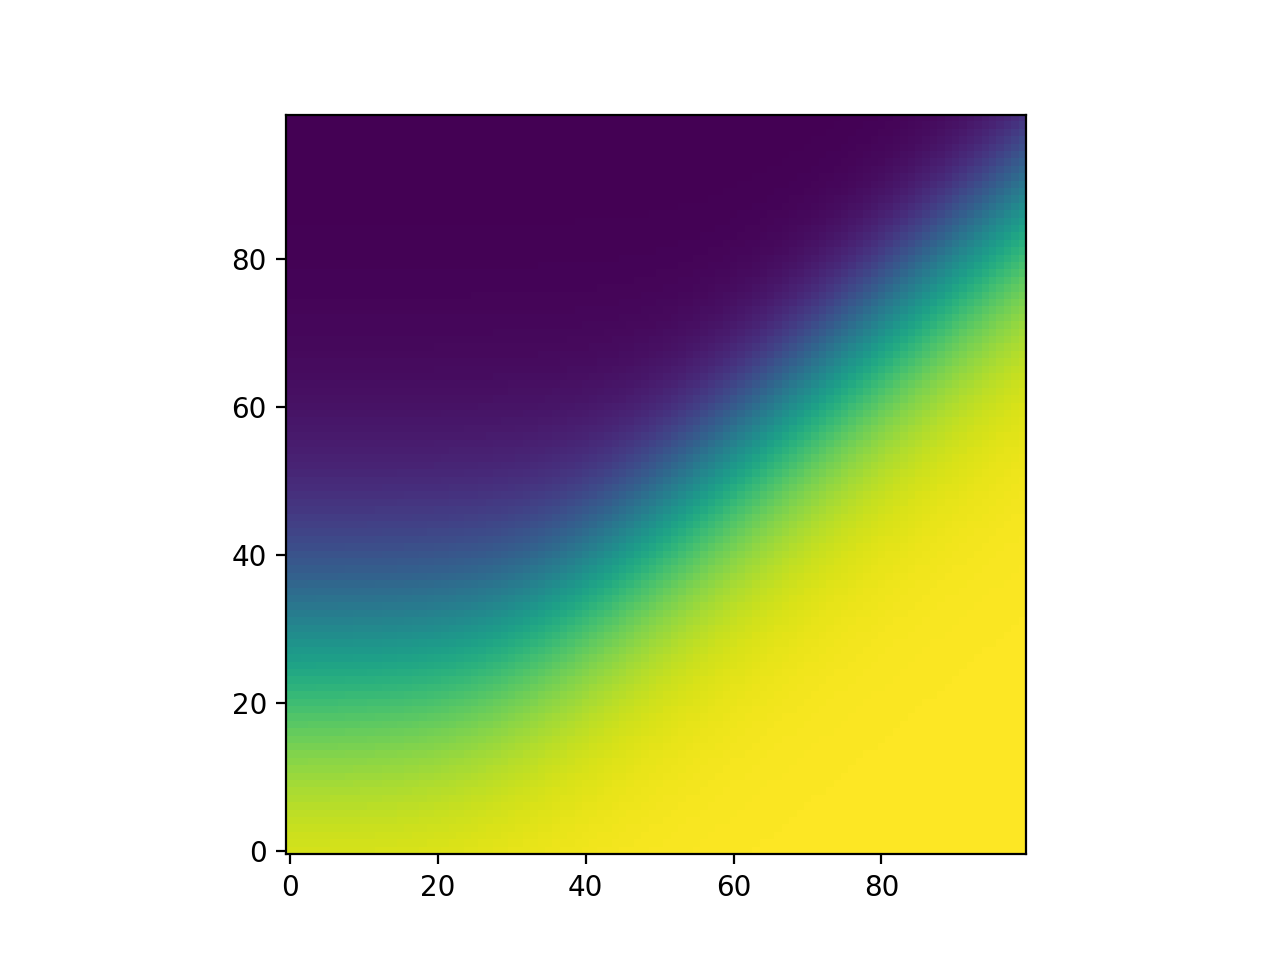

In [12]:
fig, ax = plt.subplots()
ax.imshow(res_mems, origin='lower')

<IPython.core.display.Javascript object>


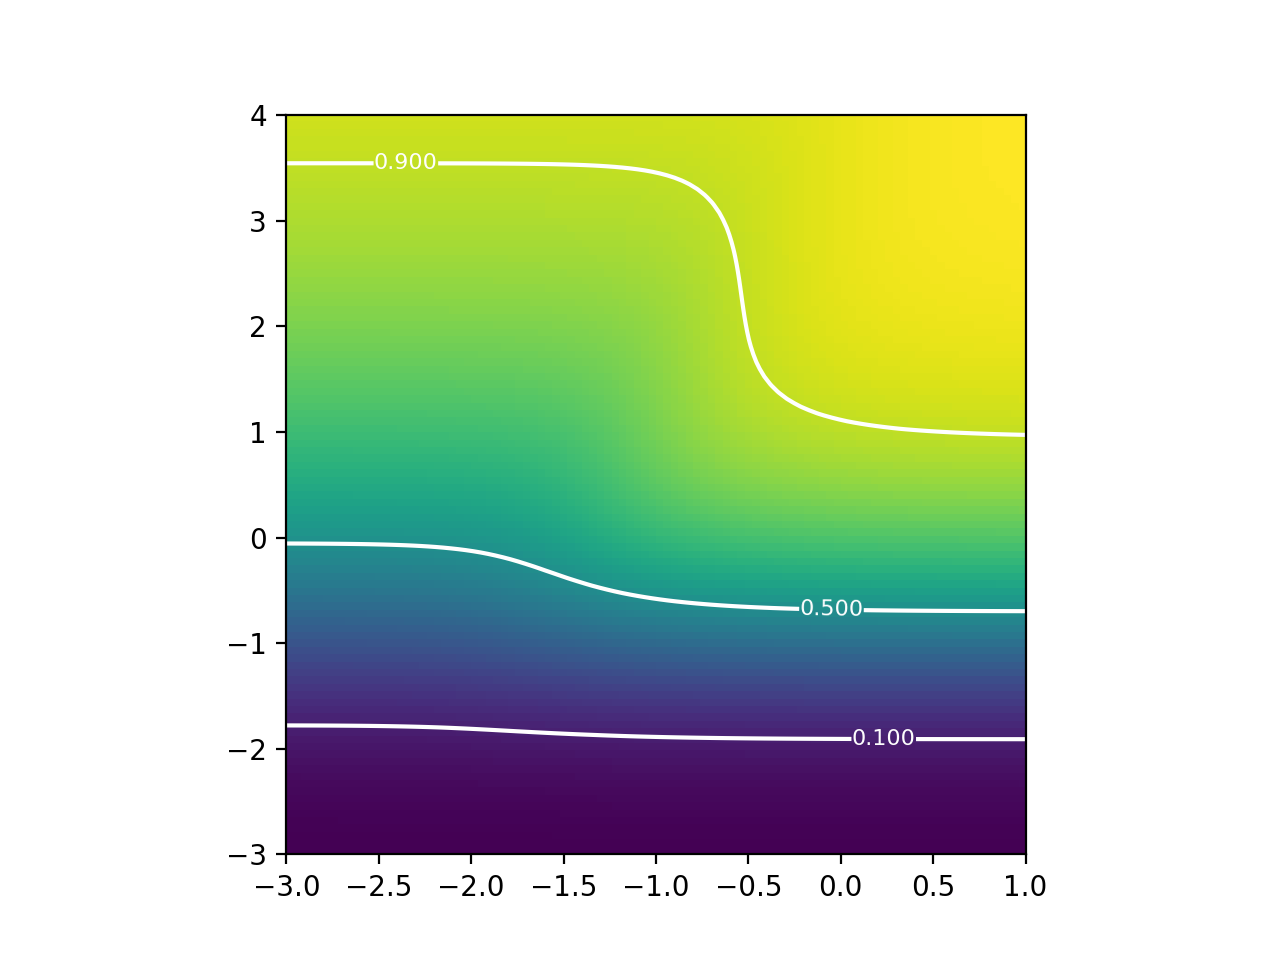

<a list of 3 text.Text objects>

In [13]:
fig, ax = plt.subplots()
res_frac = calc_frac(res_mems, 10 ** X, 10 ** Y)
ax.imshow(res_frac, origin='lower', extent=extent, aspect=aspect)
contours = ax.contour(X, Y, res_frac, colors='white', levels=[0.1, 0.5, 0.9])
ax.clabel(contours, inline=True, fontsize=8)

<IPython.core.display.Javascript object>


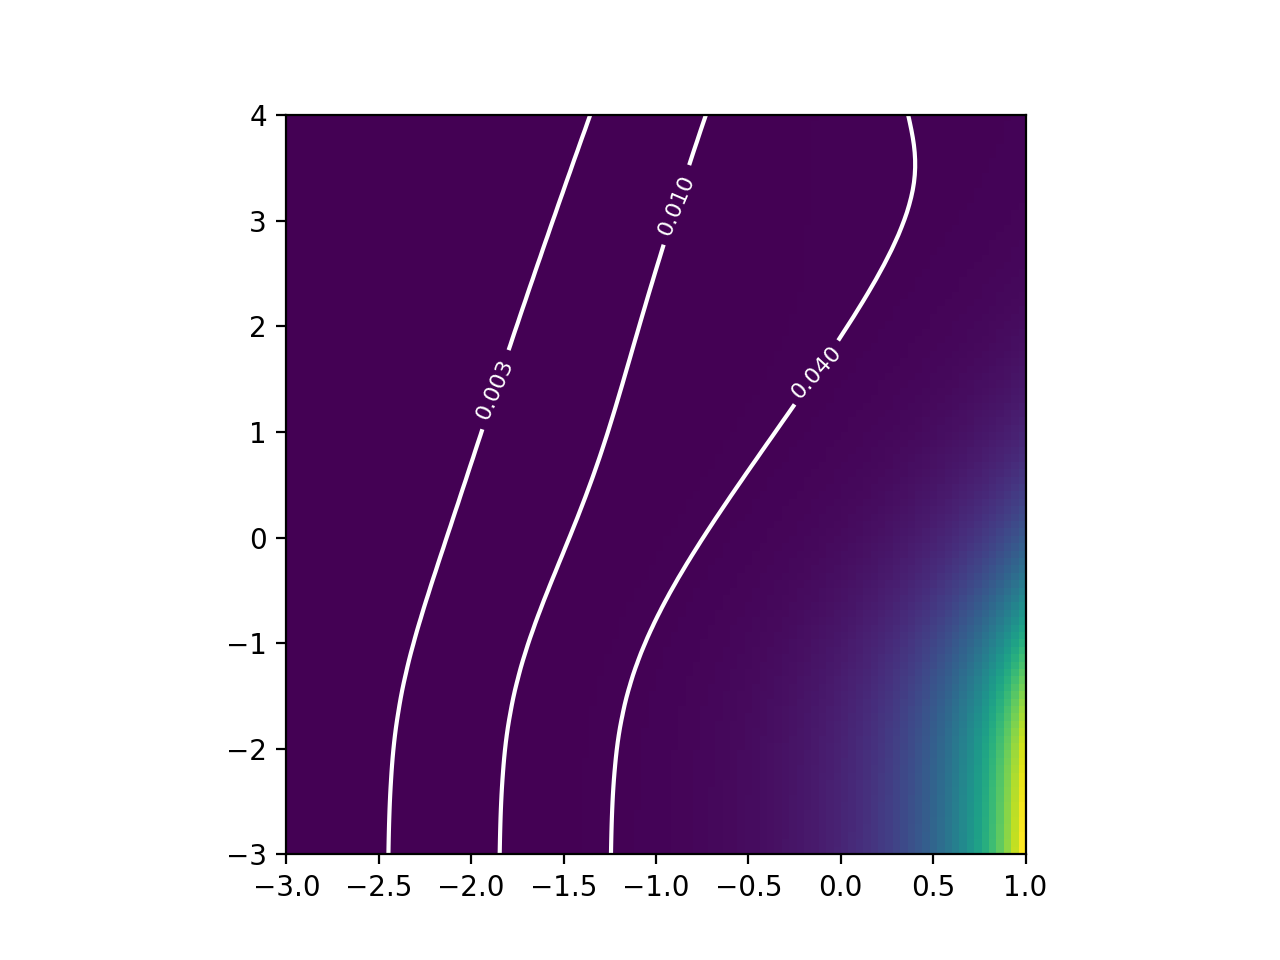

<a list of 3 text.Text objects>

In [14]:
fig, ax = plt.subplots()
res_koff = calc_koff(res_mems, 10 ** X, 10 ** Y)
ax.imshow(res_koff, origin='lower', extent=extent, aspect=aspect)
contours = ax.contour(X, Y, res_koff, colors='white', levels=[0.0025, 0.01, 0.04])
ax.clabel(contours, inline=True, fontsize=8)

<IPython.core.display.Javascript object>


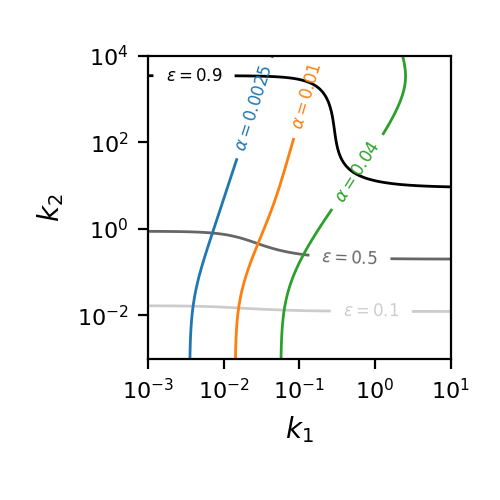

In [19]:
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

fig, ax = plt.subplots()
fig.set_size_inches(2.5, 2.5)
ax.imshow(0 * res_koff, origin='lower', extent=extent, aspect=aspect, cmap='Greys')

# frac contours
contours1a = ax.contour(X, Y, res_frac, levels=[0.1], colors='k', alpha=0.2, linewidths=1)
contours1b = ax.contour(X, Y, res_frac, levels=[0.5], colors='k', alpha=0.6, linewidths=1)
contours1c = ax.contour(X, Y, res_frac, levels=[0.9], colors='k', alpha=1, linewidths=1)

# koff contours
contours2a = ax.contour(X, Y, res_koff, levels=[0.0025], colors=['tab:blue'], linewidths=1)
contours2b = ax.contour(X, Y, res_koff, levels=[0.01], colors=['tab:orange'], linewidths=1)
contours2c = ax.contour(X, Y, res_koff, levels=[0.04], colors=['tab:green'], linewidths=1)

# Finalise figure
ax.xaxis.set_major_formatter(fake_log)
ax.yaxis.set_major_formatter(fake_log)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel(r'$k_1$')
ax.set_ylabel(r'$k_2$')
fig.tight_layout()

# Contour labels
ax.clabel(contours1a, inline=True, fontsize=6, fmt=r'$\epsilon = %.1f$')
ax.clabel(contours1b, inline=True, fontsize=6, fmt=r'$\epsilon = %.1f$')
ax.clabel(contours1c, inline=True, fontsize=6, fmt=r'$\epsilon = %.1f$')
ax.clabel(contours2a, inline=True, fontsize=6, fmt=r'$\alpha =$' + '%g')
ax.clabel(contours2b, inline=True, fontsize=6, fmt=r'$\alpha =$' + '%g')
ax.clabel(contours2c, inline=True, fontsize=6, fmt=r'$\alpha =$' + '%g')

fig.savefig('Figs/k1_k2.png', dpi=600, transparent=True)

### Energies fig 2

1) Calculate e_wd as a function of frac and koff

2) Calculate lambda e_-wd as a function of frac and koff

In [16]:
# fracs = np.linspace(0.01, 0.99, 100)
# koffs = np.linspace(0.1, 0.001, 100)
# X, Y = np.meshgrid(fracs, koffs)

# k_grid, e_wd_grid = calc_k_e(dos_base=dos_base, kon_base=kon_base, koff_base=Y, psi_base=psi_base, frac=X)

# fig, ax = plt.subplots()
# ax.imshow(np.log10(e_wd_grid), origin='lower')